In [1]:
#本章需导入的模块
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings(action = 'ignore')
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei']  #解决中文显示乱码问题
plt.rcParams['axes.unicode_minus']=False
from sklearn.datasets import make_classification,make_circles,make_regression
from sklearn.model_selection import train_test_split
import sklearn.neural_network as net
import sklearn.linear_model as LM
from scipy.stats import multivariate_normal
from sklearn.metrics import r2_score,mean_squared_error
from sklearn import svm

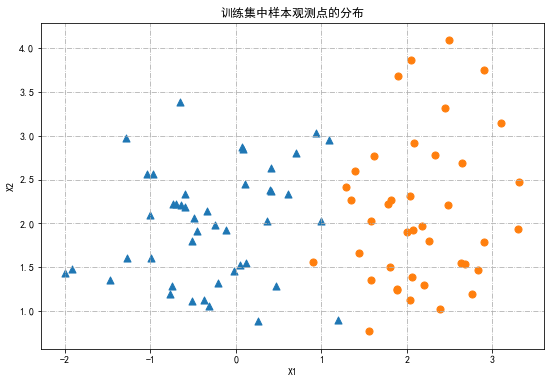

In [2]:
N=100
X,Y=make_classification(n_samples=N,n_features=2,n_redundant=0,n_informative=2,class_sep=1.2,random_state=1,n_clusters_per_class=1)
rng=np.random.RandomState(2)
X+=2*rng.uniform(size=X.shape)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size=0.85, random_state=1)

plt.figure(figsize=(9,6))
markers=['^','o']
for k,m in zip([1,0],markers):
    plt.scatter(X_train[Y_train==k,0],X_train[Y_train==k,1],marker=m,s=50)
plt.title("训练集中样本观测点的分布")
plt.xlabel("X1")
plt.ylabel("X2")
plt.grid(True,linestyle='-.')
plt.show()   

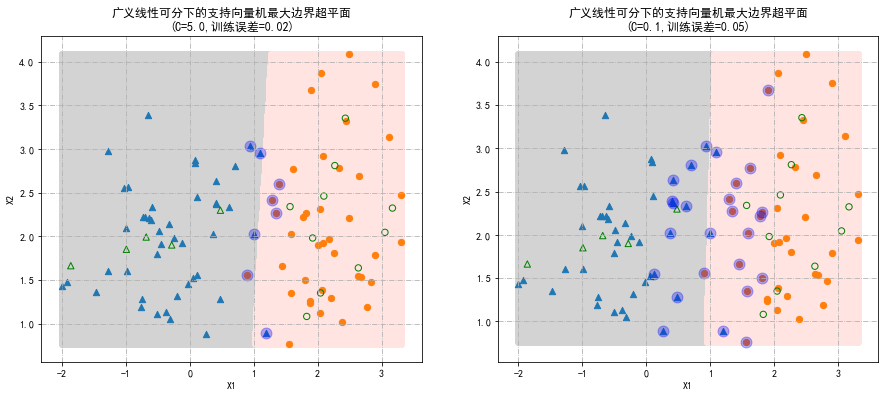

In [3]:
N=100
X,Y=make_classification(n_samples=N,n_features=2,n_redundant=0,n_informative=2,class_sep=1.2,random_state=1,n_clusters_per_class=1)
rng=np.random.RandomState(2)
X+=2*rng.uniform(size=X.shape)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size=0.85, random_state=1)
X1,X2= np.meshgrid(np.linspace(X_train[:,0].min(),X_train[:,0].max(),500),np.linspace(X_train[:,1].min(),X_train[:,1].max(),500))
X0=np.hstack((X1.reshape(len(X1)*len(X2),1),X2.reshape(len(X1)*len(X2),1)))
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(15,6))
for C,H in [(5,0),(0.1,1)]:
    modelSVC=svm.SVC(kernel='linear',random_state=123,C=C) 
    modelSVC.fit(X_train,Y_train)
    Y0=modelSVC.predict(X0)
    axes[H].scatter(X0[np.where(Y0==1),0],X0[np.where(Y0==1),1],c='lightgray')
    axes[H].scatter(X0[np.where(Y0==0),0],X0[np.where(Y0==0),1],c='mistyrose')
    for k,m in [(1,'^'),(0,'o')]:
        axes[H].scatter(X_train[Y_train==k,0],X_train[Y_train==k,1],marker=m,s=40)
        axes[H].scatter(X_test[Y_test==k,0],X_test[Y_test==k,1],marker=m,s=40,c='',edgecolors='g')
        
    axes[H].scatter(modelSVC.support_vectors_[:,0],modelSVC.support_vectors_[:,1],marker='o',c='b',s=120,alpha=0.3)
    axes[H].set_xlabel("X1")
    axes[H].set_ylabel("X2")
    axes[H].set_title("广义线性可分下的支持向量机最大边界超平面\n(C=%.1f,训练误差=%.2f)"%(C,1-modelSVC.score(X_train,Y_train)))
    axes[H].grid(True,linestyle='-.')


代码说明：
（1）第1至5行：生成用于二分类的模拟数据，包含两个输入变量。为增加两类数据的重合程度，在原有输入变量的基础上添加随机值。利用旁置法，将数据集按85%和15%划分成训练集和测试集。
（2）第6，7行：为绘制分类边界准备数据：数据为在两个输入变量取值范围内的250000个样本观测点。
（3）第9至23行：利用for循环建立惩罚参数C取5和0.1时的支持向量分类机。